### Data visualization

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_pickle('df_clean-2018-03-16-newfeat')

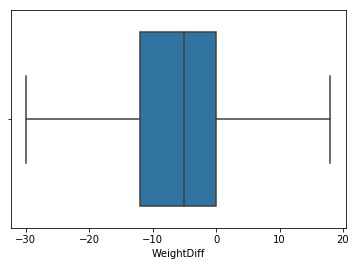

In [4]:
sns.boxplot(x='WeightDiff',data=df, showfliers=False)

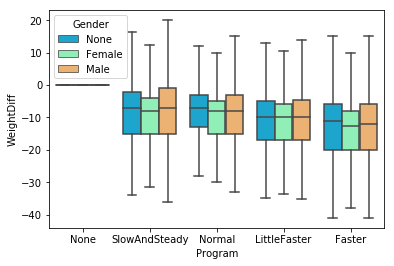

In [5]:
sns.boxplot(x='Program',y='WeightDiff',data=df, hue='Gender', palette='rainbow', 
            order=['None','SlowAndSteady','Normal','LittleFaster','Faster'],showfliers=False)

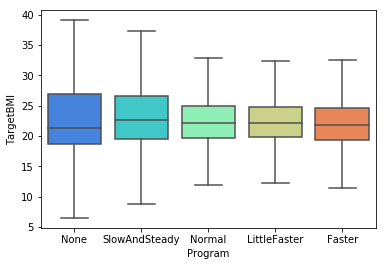

In [7]:
sns.boxplot(x='Program',y='TargetBMI',data=df,palette='rainbow',
            order=['None','SlowAndSteady','Normal','LittleFaster','Faster'],showfliers=False)

In [8]:
TWbyGender = pd.DataFrame({'female':df[df['Gender'].apply(lambda x: x=='Female')]['TargetWeight'],
                            'male':df[df['Gender'].apply(lambda x: x=='Male')]['TargetWeight']},
                           columns=['female','male'])

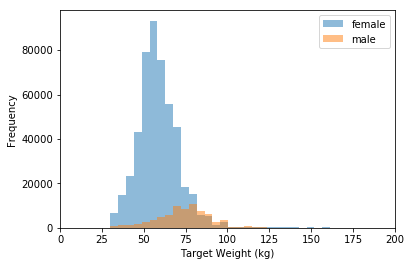

In [9]:
plt.figure()
TWbyGender.plot.hist(alpha=0.5,bins=100)
plt.xlim(0,200)
plt.xlabel('Target Weight (kg)') # by gender

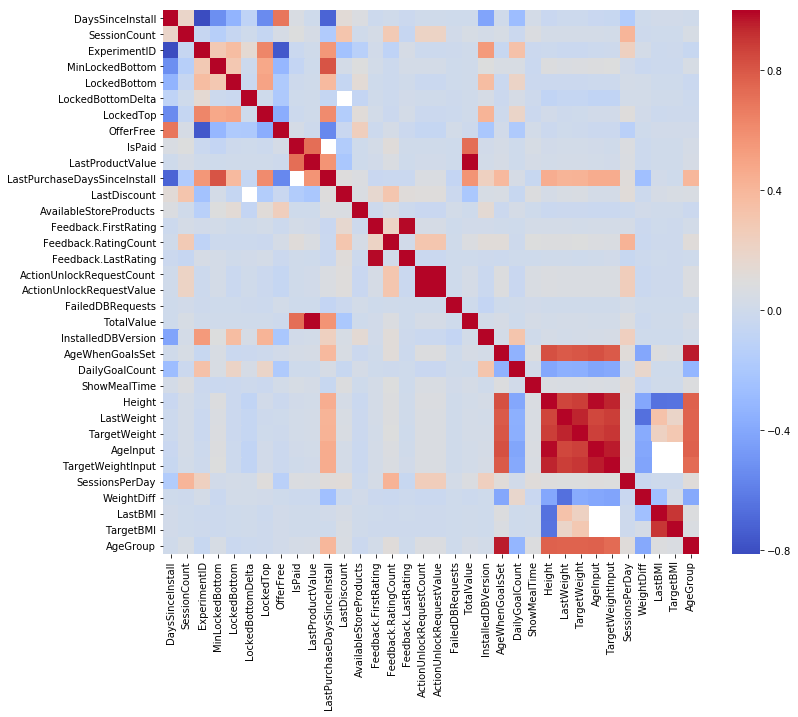

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')

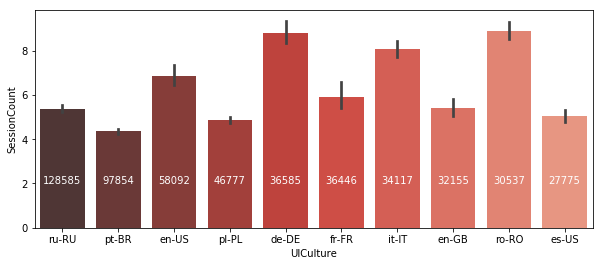

In [6]:
# UICulture vs SessionCount
plt.figure(figsize=(10,4))
country_counts = df['UICulture'].value_counts().head(10).tolist()
country_order = df['UICulture'].value_counts().head(10).index
ax = sns.barplot(x=df['UICulture'], y=df['SessionCount'], data=df, palette='Reds_d', order=country_order)

j=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            2,
             country_counts[j],
            ha="center", color='white') 
    j=j+1

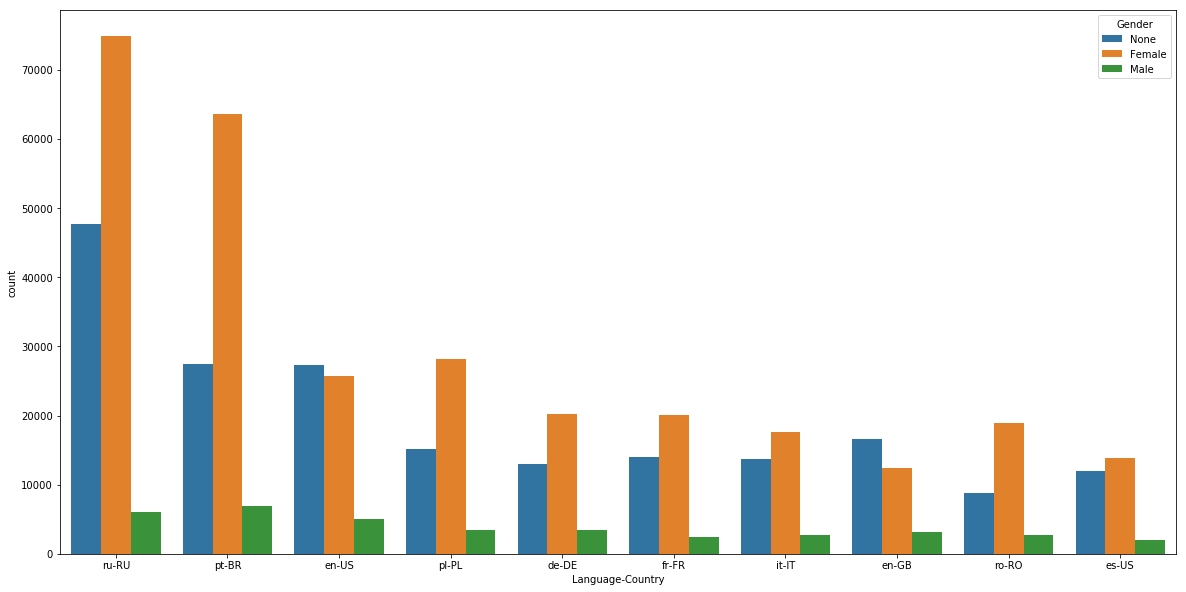

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x='UICulture', hue='Gender', data=df,
             order=df['UICulture'].value_counts().iloc[:10].index)
plt.xlabel('Language-Country')

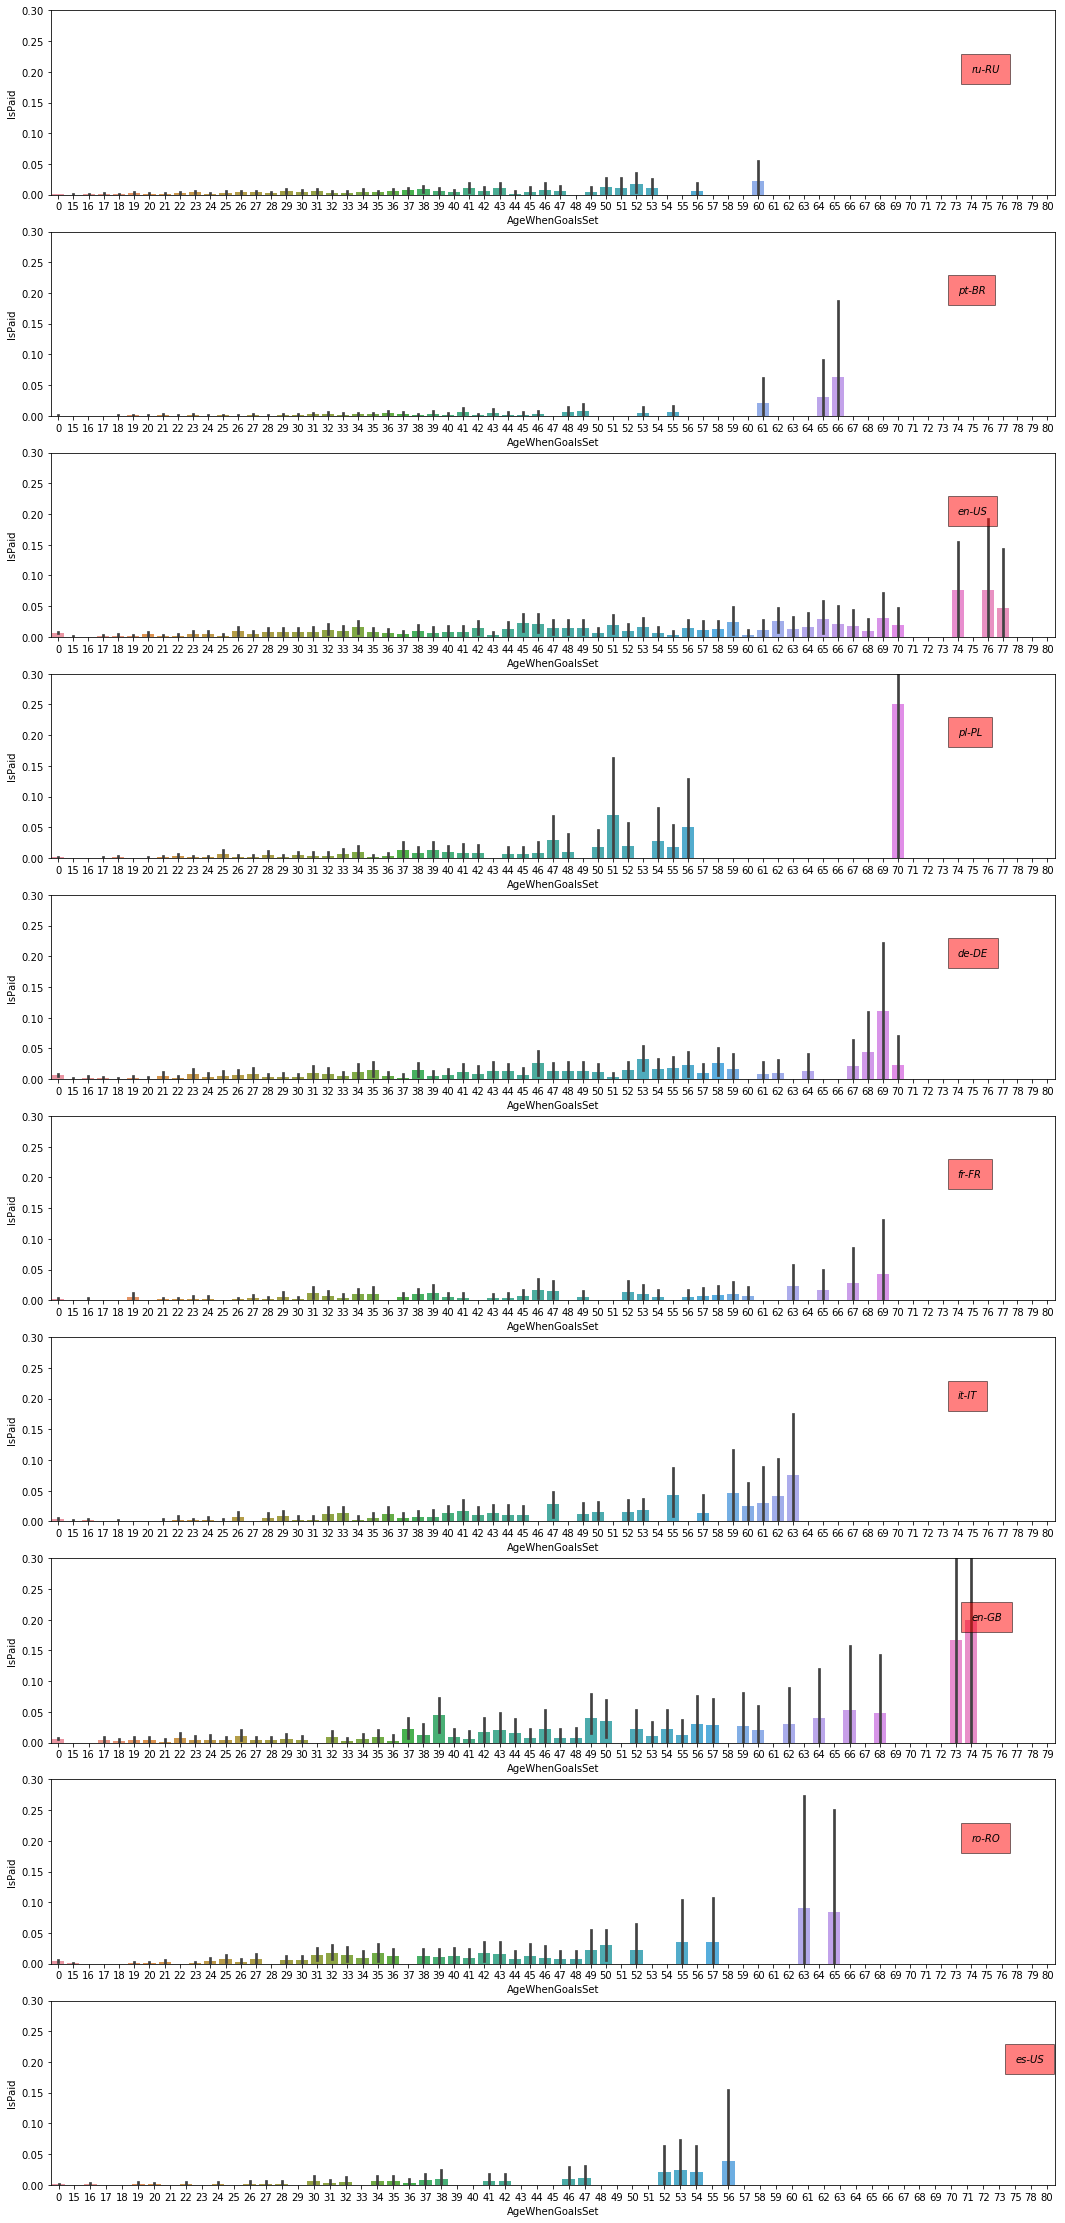

In [19]:
# Distribution of paid users with age for top 10 countries
fig, ax = plt.subplots(ncols=1, nrows=10, figsize=(18,40))
country_order = df['UICulture'].value_counts().head(10).index.tolist()
for i in range(0,10,1):
    sns.barplot(x='AgeWhenGoalsSet', y='IsPaid', data=df[df['UICulture']==country_order[i]], ax=ax[i])
    ax[i].set_ylim(0,0.3)
    ax[i].text(60, 0.2, country_order[i], style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
